# Regressão Linear - Multivariada

In [103]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv('ex1data2.txt', delimiter=' ', header=None, names=['x', 'area', 'bedroom', 'price'])
data.drop('x', axis=1, inplace=True)
data.head()

,area,bedroom,price
0,2.104,3,3.999
1,1.600,3,3.299
2,2.400,3,3.690
3,1.416,2,2.320
4,3.000,4,5.399


In [104]:
data.corr()

,area,bedroom,price
area,1.000000,0.559967,0.854988
bedroom,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


### Conforme a correlação de Pearson, temos uma relação forte entre o preço do imóvel e a área do mesmo

Coeficientes Gradiente Estocástico: [ 0.85656278  1.33240663 -0.09260926]


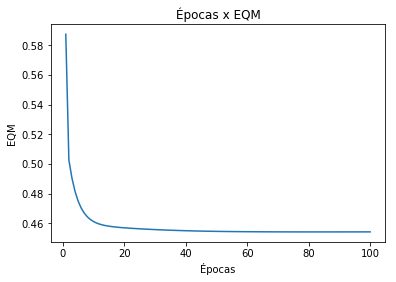

In [107]:
from sklearn.utils import shuffle

eta = 0.01
epochs = 100
errors = []


def predict(X, theta):
    return theta[0] + np.dot(X, theta[1:])

def sgd(X, y, eta, epochs):
    theta = np.random.randn(1 + X.shape[1])
        
    for epoch in range(epochs):
        sum_error = 0
        
        for f, target in zip(X,y):
            ypred = predict(f, theta)
            error = target - ypred
            sum_error += error**2
            update = eta * error
            
            theta[0] += update
            theta[1:] += update * f
            
        
        errors.append(sum_error/X.shape[0])
    
    return theta

dataFeatures = data.drop('price', axis=1).as_matrix()
dataTarget = data['price'].as_matrix()

theta = sgd(dataFeatures, dataTarget, eta, epochs)
errors = np.array(errors)

plt.plot(np.arange(1, errors.shape[0]+1), errors, '-')
plt.title("Épocas x EQM")
plt.xlabel('Épocas')
plt.ylabel('EQM')
print("Coeficientes Gradiente Estocástico: {}".format(theta))

### Seguindo a mesma ideia do problema de Regressão Linear Univariada, temos que o algoritmo aprende, conforme o EQM diminui, mas até um certo ponto, esse o qual representa, aproximadamente, a época 20. A partir de então, o aprendizado não é tão significativo.

In [108]:
from numpy.linalg import inv

dataFeaturesWithOnes = np.ones((dataFeatures.shape[0], dataFeatures.shape[1]+1))
dataFeaturesWithOnes[:,1:] = dataFeatures

dataTranspose = np.transpose(dataFeaturesWithOnes)

thetaLeastSquares = np.dot( np.dot( inv( np.dot(dataTranspose, dataFeaturesWithOnes) ), dataTranspose ), dataTarget )
print('Coeficientes Minimos Quadrados: {}'.format(thetaLeastSquares))

Coeficientes Minimos Quadrados: [ 0.8959791   1.39210674 -0.08738019]


### Conforme os resultados dos coeficientes, podemos reparar valores próximos, mas distintos. Mesmo que o processo dos Mínimos Quadrados seja minimizar o somatórios do erros quadráticos, tal fator ocorre pois o processo dos Mínimos Quadrados ocorre em Batch, desconsiderando a evolução dos coeficientes durante o processo. Assim, conforme o processo do Gradiente Estocástico, os coeficientes são atualizados em cada iteração sobre os dados, ou seja, para cada linha de dados, o processo atualiza. 